# Neural Networks


Link to the dataset: https://drive.google.com/file/d/1G12DoncT43hYmA72ZyY2xhyukrhnDTBn/view?usp=sharing

---





In [26]:
# Import the necessary libraries

import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import shutil
import pandas as pd
import random
import numpy as np

# If using Google Colab, use the following package to display the image
# If running on your local system, cv2.imshow shall work fine
# If running on your local system please comment the line below
from google.colab.patches import cv2_imshow

In [25]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [27]:
IMG_HEIGHT = 40
IMG_WIDTH = 40

# Dataset

The dataset used here is a synthetic alphabet recognition dataset. It consists of images of lowercase English alphabets, generated with handwritten-fonts. All images are single channel (grayscale) and have size 40 * 40. <br>

The dataset has the following directory structure:

<pre>
<b>CR-Dataset</b>
|__ <b>train</b>
    |______ <b>a</b>: [a_1.png, a_2.png, a_3.png ....]
    |______ <b>b</b>: [b_1.png, b_2.png, b_3.png ....]
        .
        .
        .
    |______ <b>y</b>: [y_1.png, y_2.png, y_3.png ....]    
    |______ <b>z</b>: [z_1.png, z_2.png, z_3.png ....]   
    
|__ <b>validation</b>
    |______ <b>a</b>: [a_221.png, a_322.png, a_353.png ....]
    |______ <b>b</b>: [b_241.png, b_352.png, b_363.png ....]
        .
        .
        .
    |______ <b>y</b>: [y_221.png, y_322.png, y_353.png ....]
    |______ <b>z</b>: [z_241.png, z_352.png, z_363.png ....]
    
|__ <b>test</b>: [a_521.png, b_272.png, g_433.png ....]
</pre>
*Note:* The file names are for representation only, they may differ in the original dataset.<br>


Extract the paths of these directories onto different variables to facilitate accessing the dataset and thereby training the model.

In [28]:

#Add the paths for train, validation and test directories

train_dir_path= '/content/drive/MyDrive/CR-Dataset/Train'
validation_dir_path = '/content/drive/MyDrive/CR-Dataset/Validation'
test_dir_path = '/content/drive/MyDrive/CR-Dataset/Test'

# Generate Image Batches


---


Fitting the model on entire training set may be memory and computation inefficient. Hence we generate batches of images to be processed by the model. `ImageDataGenerator` class in tensorflow facilitates this. 

Describe the various arguments in the instantiation of `tensorflow.keras.preprocessing.image.ImageDataGenerator` object.


---

**3 Points**

---
featurewise_center(Boolean) : Set input mean to 0 over the dataset, feature-wise.

samplewise_center(Boolean) : Set each sample mean to 0.

featurewise_std_normalization(Boolean) : Divide inputs by std of the dataset, feature-wise.

samplewise_std_normalization(Boolean) : Divide each input by its std.

zca_epsilon	: epsilon for ZCA whitening. Default is 1e-6.

zca_whitening :	Boolean. Apply ZCA whitening.

rotation_range :	Int. Degree range for random rotations.

width_shift_range :	Float, 1-D array-like or int

height_shift_range :	Float, 1-D array-like or int

brightness_range :	Tuple or list of two floats. Range for picking a 
brightness shift value from.

shear_range :	Float. Shear Intensity 

zoom_range :	Float or [lower, upper]. Range for random zoom.

channel_shift_range	Float : Range for random channel shifts

fill_mode : One of {"constant", "nearest", "reflect" or "wrap"}. Default is 'nearest'.

cval :	Float or Int. Value used for points outside the boundaries when fill_mode = "constant"

horizontal_flip	Boolean : Randomly flip inputs horizontally.

vertical_flip	Boolean : Randomly flip inputs vertically.

rescale	rescaling factor: Defaults to None. 

preprocessing_function :	function that will be applied on each input. The function will run after the image is resized and augmented. 

data_format :	Image data format, either "channels_first" or "channels_last"

validation_split	: Float. Fraction of images reserved for validation (strictly between 0 and 1).

dtype :	Dtype to use for the generated arrays.

Describe the arguments of `flow_from_directory()` method of the `tensorflow.keras.preprocessing.image.ImageDataGenerator` object. 
The directory must be set to the path where your ‘n’ classes of folders are present.

target_size  : the size of your input images, every image will be resized to this size.

color_mode: if the image is either black and white or grayscale set “grayscale” or if the image has three color channels, set “rgb”.

batch_size: No. of images to be yielded from the generator per batch.

class_mode: Set “binary” if you have only two classes to predict, if not set to“categorical”, in case if you’re developing an Autoencoder system, both input and the output would probably be the same image, for this case set to “input”.

shuffle: Set True if you want to shuffle the order of the image that is being yielded, else set False.

seed: Random seed for applying random image augmentation and shuffling the order of the image.

**3 Points**

---

Create a function that returns a generator object which shall fetch batches of images from the specified directory. This function shall be reused for fetching images from train and validation directories.



---

**3 Points**


---




In [29]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False, samplewise_center=False,
    featurewise_std_normalization=False, samplewise_std_normalization=False,
    zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0,
    height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0,
    channel_shift_range=0.0, fill_mode='nearest', cval=0.0,
    horizontal_flip=False, vertical_flip=False, rescale=None,
    preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None
)

In [30]:
def get_generator_from_dir(directory_path, batch_size_):
    data_batch_generator = datagen.flow_from_directory(
    directory=directory_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    color_mode="grayscale",
    batch_size=batch_size_,
    class_mode="categorical",
    shuffle=True)

    return data_batch_generator

Describe the arguments of `flow_from_dataframe()` method of the `tensorflow.keras.preprocessing.image.ImageDataGenerator` object. 

---

**3 Points**
directory — Path to the directory which contains all the images.

x_col — (str) The name of the column which contains the filenames of the images.
y_col — (str or list of str)  the name of the column which contains the class names , if class_mode is not “raw” or not “input”.

class_mode — (str) accepts “categorical”(default), ”binary”, ”sparse”, ”input”, None and also an extra argument “raw”.

batch_size: keept this according to your needs generally but for test generator it is set to some number that divides your total number of images in your test set exactly.
Why this only for test_generator?

shuffle: Set this to False(For Test generator only, for others set True)

drop_duplicates: If duplicate entries arenot needed in dataframe’s x_col, set this to False, default is True.

validate_filenames: whether to validate image filenames in x_col. If True, invalid images will be ignored. Disabling this option can lead to speed-up in the instantiation of this class if you have a huge amount of files, default is True.

---

Create a function that returns a generator object which shall fetch batches of images from the specified directory using a dataframe that has information about images and their labels. This function shall be reused for fetching images from test directory.



---

**3 Points**


---




In [31]:
def get_generator_from_dataframe(directory_path, dataframe, batch_size_):
    data_batch_generator=datagen.flow_from_dataframe(
        dataframe=dataframe,
        directory= directory_path,
        x_col = "Image",
        y_col = "Label",
        shuffle=True,
        class_mode="categorical",
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        Color_mode='grayscale')



    return data_batch_generator

Create a function that returns a dataframe having image file names and their corresponding class labels for a folder. This will help in creating generator from a dataframe.



---

**2 Points**


---




In [32]:
def get_dataframe(folder_name):
    images = []
    labels = []
    # Insert code to give you list of all the image files in folder
    for fname in os.listdir(folder_name):
        img = cv2.imread(os.path.join(folder_name,fname))
        if img is not None:
            images.append(fname)
    # Insert code to get list of labels from list of images 
    # (Hint: every image file name has its label name as prefix)
    for item in images:
      labels.append(item[0])
      print

    # Make a dataframe with two columns - Image(file name) and Label (class label)
    a_zip = zip(images, labels)
    data = list(a_zip)
    df = pd.DataFrame(data, columns = ['Image', 'Label'])
    #display and return the dataframe
    print(df)
    return df

Describe the arguments for the following functions callable on a `tensorflow.keras.Sequential` model object :

1. add() **[3 Points]**

> layer : 	layer instance.

2. compile() **[3 Points]**

> optimizer	String (name of optimizer) or optimizer instance. See tf.keras.optimizers.

loss :	String (name of objective function), objective function or tf.

metrics	: List of metrics to be evaluated by the model during training and testing. 

loss_weights : list or dictionary specifying scalar coefficients (Python floats) to weight the loss contributions of different model outputs. 

weighted_metrics :	List of metrics to be evaluated and weighted by sample_weight or class_weight 

run_eagerly	(Bool): Default - False. If True, Model's logic will not be wrapped in a tf.function.

steps_per_execution	(Int) : Default-1. The number of batches to run during each tf.function call.
kwargs :	Arguments supported for backwards compatibility only.

3. fit() **[3 Points]**

> x	 : Input data . It can be a Numpy array or TensorFlow tensor or a dict mapping input names to the corresponding array/tensors , tf.data dataset or A generator 

y    :	Target data.

batch_size	: (Integer or None) Number of samples per gradient update. 

epochs	: (Integer) Number of epochs to train the model i.e an iteration over the entire x and y data provided. 

verbose	: 0 = silent, 1 = progress bar, 2 = one line per epoch. 

callbacks : List of callbacks to apply during training. 

validation_split :	Float between 0 and 1. Fraction of the training data to be used as validation data. 

validation_data :	Data on which to evaluate the loss and any model metrics at the end of each epoch. 

class_weight : dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only).

initial_epoch	: (Integer) Epoch at which to start training (useful for resuming a previous training run).

steps_per_epoch :	(Integer or None) Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch. 

validation_steps :	Number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch.

validation_batch_size :Number of samples per validation batch.

validation_freq :	(Integer or collections_abc.Container instance) If an integer - specifies how many training epochs to run before a new validation run is performed. If a Container - specifies the epochs on which to run validation.

max_queue_size :	(Integer) Maximum size for the generator queue.

workers: 	(Integer)Maximum number of processes to spin up when using process-based threading.

use_multiprocessing:	(Boolean)If True, use process-based threading. If unspecified, use_multiprocessing will default to False.

4. predict()  **[3 Points]**

> *Your answer here*
x : 	Input samples.

batch_size :	(Integer or None) Number of samples per batch.By default 32.

steps :	Total number of batches of samples before declaring the prediction round finished.

callbacks	: List of keras.callbacks.Callback instances.

max_queue_size :	(Integer) Used for generator or keras.utils.Sequence input only. Maximum size for the generator queue.

workers	: (Integer) Used for generator or keras.utils.Sequence input only. Maximum number of processes to spin up when using process-based threading. 

use_multiprocessing	: (Boolean) Used for generator or keras.utils.Sequence input only. If True, use process-based threading.

Describe the arguments used when instantiating the following `tensorflow.keras.layers` :
1. Conv2D() **[3 Points]**

> Arguments
filters	: (Integer)  number of output filters in the convolution.

kernel_size	: (integer or tuple or list of 2 integers) species the height and width of the 2D convolution window. 

strides	: (integer or tuple/list of 2 integers) specifies the strides of the convolution along the height and width. 

padding	: ("valid" or "same"). "valid" means no padding. "same" means  padd evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input.

data_format :	(string) The ordering of the dimensions in the inputs. 

dilation_rate	: (integer or tuple/list of 2 integers) species the dilation rate to use for dilated convolution. 

groups :	(+ve integer) species the number of groups in which the input is split along the channel axis.

activation :	Activation function to use. 

use_bias :	(Bool) specifies whether the layer uses a bias vector.

kernel_initializer	: Initializer for the kernel weights matrix 

bias_initializer	: Initializer for the bias vector 

kernel_regularizer	: Regularizer function applied to the kernel weights matrix

bias_regularizer	: Regularizer function applied to the bias vector.

activity_regularizer :	Regularizer function applied to the output of the layer.

kernel_constraint	: Constraint function applied to the kernel matrix.

bias_constraint :	Constraint function applied to the bias vector.

2. MaxPooling2D() **[3 Points]**

> pool_size	: (integer or tuple of 2 integers) window size over which to take the maximum. 

strides	: (Integer, tuple of 2 integers, or None). Specifies how far the pooling window moves for each pooling step. 

padding	: ("valid" or "same"). "valid" means no padding. "same" means even padding to the left/right or up/down of the input such that output has the same height/width dimension as the input.

data_format :	(string, one of channels_last or channels_first). The ordering of the dimensions in the inputs. 

3. Flatten()  **[3 Points]**

> data_format	: ( string) one of channels_last (default) or channels_first. The ordering of the dimensions in the inputs. 

4. Dense()  **[3 Points]**

> units : (Positive integer) dimensionality of the output space.

activation : specifies the activation function to use.

use_bias :	(Boolean)  whether the layer uses a bias vector.

kernel_initializer :	Initializer for the kernel weights matrix.

bias_initializer :	Initializer for the bias vector.

kernel_regularizer :	Regularizer function applied to the kernel weights matrix.

bias_regularizer: Regularizer function applied to the bias vector.

activity_regularizer :	Regularizer function applied to the output of the layer (its "activation").

kernel_constraint	: Constraint function applied to the kernel weights matrix.

bias_constraint	: Constraint function applied to the bias vector.

5. Dropout() **[3 Points]**

> rate :	(Float between 0 and 1) Fraction of the input units to drop.

noise_shape	: (1D integer tensor) represents the shape of the binary dropout mask that will be multiplied with the input.

seed	: A Python integer to use as random seed.



# Defining the model architecture

---



We have defined our prediction model architecture here. **Please dont make any changes to the two blocks below.**

In [33]:
def build_model(dropout_probability = 0,LR=1e-4):
    
    # Creating a Keras sequential model
    model = tf.keras.models.Sequential()
    
    # Adding layers 
    model.add(tf.keras.layers.Flatten(input_shape=(IMG_WIDTH,IMG_HEIGHT, 1)))
    model.add(tf.keras.layers.Dense(512, activation='tanh',kernel_initializer='he_uniform'))
    model.add(tf.keras.layers.Dense(512, activation='relu',kernel_initializer='glorot_uniform'))
    model.add(tf.keras.layers.Dense(512, activation='tanh',kernel_initializer='he_uniform',))
    model.add(tf.keras.layers.Dropout(dropout_probability))
    model.add(tf.keras.layers.Dense(26,activation='softmax'))
    
    # Optimizers, loss function and performance metrics
    opt = tf.keras.optimizers.Adam(learning_rate=LR)
    cat_loss = tf.keras.losses.CategoricalCrossentropy()
    acc_metrics = [tf.keras.metrics.CategoricalAccuracy()]
    
    # Compiling the model
    model.compile(optimizer=opt, loss=cat_loss, metrics=acc_metrics)
    
    return model

In [34]:
#  Variables needed for subsequent sections
num_epochs = 40


labels=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

# Best Learning Rate determination

---



Now we are ready to start working with the model. The hyperparameters we would like you to experiment are learning rate of the optimizer, batch size and dropout probability. We shall start with the  experimentation of **learning rate**. Discuss the impact of learning rate on model training and performance.


---
**5 Points**


---




In [39]:
def determine_best_learning_rate():
    learning_rates = [1e-3,1e-4,1e-5]
    avg_val_accuracies = []
    dic = {}
    # Insert your code here to get generators that fetch batches from train and validation directories (use batch size 16)
    train = get_generator_from_dir(train_dir_path, 16)
    validate = get_generator_from_dir(validation_dir_path, 16)

    for l_rate in learning_rates:
        
        # Insert your code here to build a model with the current learning rate
        model = build_model(LR=l_rate)
        # Insert your code here to train the model using the training set and validate using the validation set
        Hist = model.fit(train, validation_data=validate,epochs = 8)     # Insert your code here to find the average validation accuracy for this model setting and append it to the maintained list
        acc = Hist.history['val_categorical_accuracy']
        d = sum(acc)/len(acc)
        avg_val_accuracies.append(d)
        
        dic[l_rate] = d
    # Insert your code here to figure out the learning rate which gives the highest average validation accuracy. Print the value and return it.
    dic = dict(sorted(dic.items(), key=lambda item: item[1]))
    best = list(dic.keys())[-1]
    print(dict)
    print("best = ",best)
    return best

# determine_best_learning_rate() is being called here
best_lr = determine_best_learning_rate()

Found 20220 images belonging to 26 classes.
Found 374 images belonging to 26 classes.
Epoch 1/8
1264/1264 [==============================] - 25s 19ms/step - loss: 3.4453 - categorical_accuracy: 0.0371 - val_loss: 3.4043 - val_categorical_accuracy: 0.0374
Epoch 2/8
1264/1264 [==============================] - 24s 19ms/step - loss: 3.4140 - categorical_accuracy: 0.0344 - val_loss: 3.3763 - val_categorical_accuracy: 0.0508
Epoch 3/8
1264/1264 [==============================] - 24s 19ms/step - loss: 3.4039 - categorical_accuracy: 0.0364 - val_loss: 3.4096 - val_categorical_accuracy: 0.0535
Epoch 4/8
1264/1264 [==============================] - 24s 19ms/step - loss: 3.4091 - categorical_accuracy: 0.0392 - val_loss: 3.3946 - val_categorical_accuracy: 0.0267
Epoch 5/8
1264/1264 [==============================] - 24s 19ms/step - loss: 3.4110 - categorical_accuracy: 0.0417 - val_loss: 3.4012 - val_categorical_accuracy: 0.0561
Epoch 6/8
1264/1264 [==============================] - 24s 19ms/step 

# Best Dropout Probability determination

---


Use the best batch size determined in the previous section for the subsequent sections. We shall now do experimentation of **dropout probability** parameter. Discuss the impact of dropout probability on model performance.


---
**5 Points**


---

In [44]:
def determine_best_dropout_probability():
    dropout_probs = [0,0.25,0.5,0.75]
    avg_val_accuracies = []
    dic1={}
    #best_lr = determine_best_learning_rate()
    # Insert your code here to get generators that fetch batches from train and validation directories (use batch size 16)
    train = get_generator_from_dir(train_dir_path, 16)
    validate = get_generator_from_dir(validation_dir_path, 16)

    for prob in dropout_probs:
        
        
        # Insert your code here to build a model with the current dropout probability
        model = build_model(dropout_probability = prob , LR = best_lr)

        # Insert your code here to train the model using the training set and validate using the validation set
        hist = model.fit(train, validation_data=validate,epochs = 8)
       
        # Insert your code here to find average validation accuracy for this model setting and append it to the maintained list
        acc = hist.history['val_categorical_accuracy']
        d = sum(acc)/len(acc)
        avg_val_accuracies.append(d)
        
        dic1[prob] = d
    # Insert your code here to figure out the dropout probability which gives the highest average validation accuracy. Print the value and return it.
    dic1 = dict(sorted(dic1.items(), key=lambda item: item[1]))
    print(dic1)
    best1 = list(dic1.keys())[-1]
    print("best choice:",best1)
    return best1
# determine_best_dropout_probability() is being called here
best_prob = determine_best_dropout_probability()

Found 20220 images belonging to 26 classes.
Found 374 images belonging to 26 classes.
Epoch 1/8
1264/1264 [==============================] - 25s 19ms/step - loss: 3.1925 - categorical_accuracy: 0.1018 - val_loss: 2.8658 - val_categorical_accuracy: 0.1765
Epoch 2/8
1264/1264 [==============================] - 25s 19ms/step - loss: 2.6716 - categorical_accuracy: 0.2859 - val_loss: 2.5209 - val_categorical_accuracy: 0.2781
Epoch 3/8
1264/1264 [==============================] - 24s 19ms/step - loss: 2.3182 - categorical_accuracy: 0.3786 - val_loss: 2.3153 - val_categorical_accuracy: 0.3957
Epoch 4/8
1264/1264 [==============================] - 24s 19ms/step - loss: 2.0909 - categorical_accuracy: 0.4294 - val_loss: 2.1444 - val_categorical_accuracy: 0.4118
Epoch 5/8
1264/1264 [==============================] - 25s 20ms/step - loss: 1.9230 - categorical_accuracy: 0.4792 - val_loss: 2.0579 - val_categorical_accuracy: 0.4225
Epoch 6/8
1264/1264 [==============================] - 24s 19ms/step 

# Best Batch Size determination

---


Use the best learning rate and best dropout probablity determined in the previous sections for the subsequent sections. We shall now do experimentation of **batch size** parameter. Discuss the impact of batch size on model performance.


---
**5 Points**


---


In [51]:
def determine_best_batch_size():
    batch_sizes = [16,32,64]
    avg_val_accuracies = []
    dic2={}
    

    for bsize in batch_sizes:
        
        # Insert your code here to build a model with the default dropout probability and learning rate
         model = build_model(dropout_probability=best_prob , LR = best_lr)
         train = get_generator_from_dir(train_dir_path, bsize)
         validate = get_generator_from_dir(validation_dir_path, bsize)
         hist = model.fit(train, validation_data=validate,epochs = 8)
         acc = hist.history['val_categorical_accuracy']
         d = sum(acc)/len(acc)
         avg_val_accuracies.append(d)
        
         dic2[bsize] = d
        
    # Insert your code here to figure out the batch size which gives the highest average validation accuracy. Print the value and return it.
    print(dic2)
    dic2 = dict(sorted(dic2.items(), key=lambda item: item[1]))
    print(dic2)
    best2 = list(dic2.keys())[-1]
    print("best choice:",best2)
    return best2


# determine_best_batch_size() is being called here
best_batch_size = determine_best_batch_size()

Found 20220 images belonging to 26 classes.
Found 374 images belonging to 26 classes.
Epoch 1/8
1264/1264 [==============================] - 25s 19ms/step - loss: 3.1743 - categorical_accuracy: 0.1028 - val_loss: 2.8435 - val_categorical_accuracy: 0.2059
Epoch 2/8
1264/1264 [==============================] - 24s 19ms/step - loss: 2.6623 - categorical_accuracy: 0.2762 - val_loss: 2.5038 - val_categorical_accuracy: 0.3316
Epoch 3/8
1264/1264 [==============================] - 24s 19ms/step - loss: 2.3435 - categorical_accuracy: 0.3633 - val_loss: 2.3631 - val_categorical_accuracy: 0.3449
Epoch 4/8
1264/1264 [==============================] - 24s 19ms/step - loss: 2.1390 - categorical_accuracy: 0.4230 - val_loss: 2.1474 - val_categorical_accuracy: 0.4011
Epoch 5/8
1264/1264 [==============================] - 24s 19ms/step - loss: 1.9730 - categorical_accuracy: 0.4643 - val_loss: 2.0866 - val_categorical_accuracy: 0.4011
Epoch 6/8
1264/1264 [==============================] - 24s 19ms/step 

# Images Visualization

---


Now we shall train our model with best hyperparameters. As a first step we need to plot images to have visual understanding of the data. This image visualization shall be reused. Hence create a custom **function to visualize images**.


---
**2 Points**


---




In [52]:
def visualize_image(img):
    # Insert your code here to visualize a given image
    img = cv2.imread(img)
    plt.figure()
    plt.imshow(img)
    plt.show


# Make generators ready

---

Create generators to fetch batches from train and validation directory. For test samples, create with the help of get_dataframe() method. You may use best batch size determined earlier.



---
**3 Points**


---




In [53]:
        train = get_generator_from_dir(train_dir_path, best_batch_size)
        validate = get_generator_from_dir(validation_dir_path, best_batch_size)
        dataframe = get_dataframe('/content/drive/MyDrive/CR-Dataset/Test')
        test = get_generator_from_dataframe(test_dir_path, dataframe, best_batch_size)

Found 20220 images belonging to 26 classes.
Found 374 images belonging to 26 classes.
          Image Label
0    c_1193.png     c
1    d_1339.png     d
2    c_1123.png     c
3     a_925.png     a
4       d_8.png     d
..          ...   ...
411  y_3944.png     y
412  x_3861.png     x
413  x_3806.png     x
414     y_9.png     y
415     z_8.png     z

[416 rows x 2 columns]
Found 416 validated image filenames belonging to 26 classes.


# Class-wise samples Plot

---

Plot the class-wise number of samples present in training, validation and test directory. Also, visualise 5 samples each from train, validation and test directories.



---
**5 Points (3+2)**


---




          Image Label
0    c_1193.png     c
1    d_1339.png     d
2    c_1123.png     c
3     a_925.png     a
4       d_8.png     d
..          ...   ...
411  y_3944.png     y
412  x_3861.png     x
413  x_3806.png     x
414     y_9.png     y
415     z_8.png     z

[416 rows x 2 columns]
Samples from Train Directory
Samples from Validation Directory
Samples from Test Directory


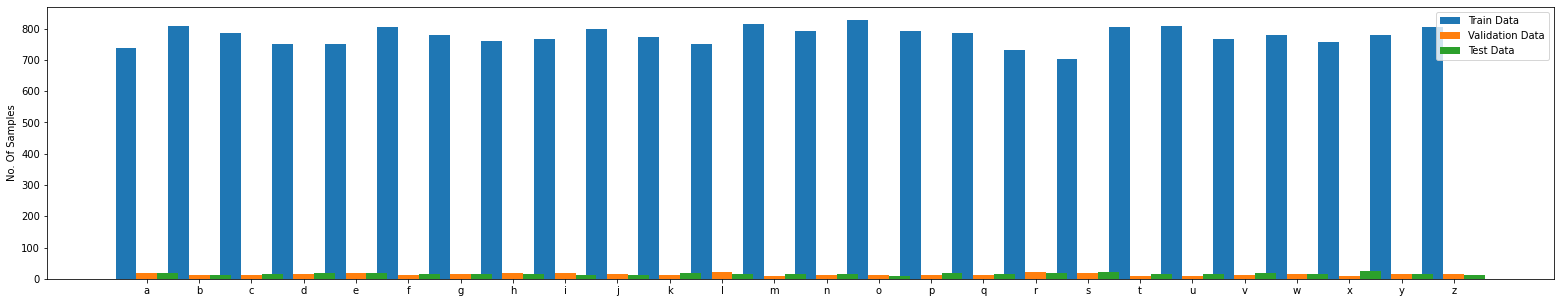

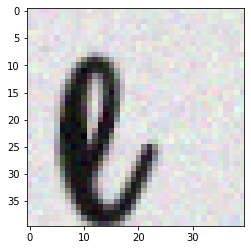

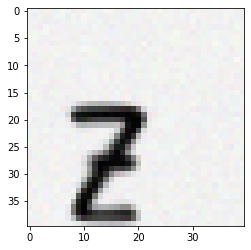

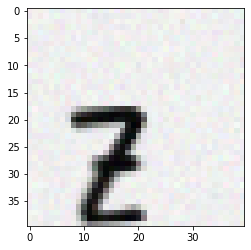

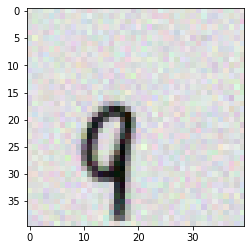

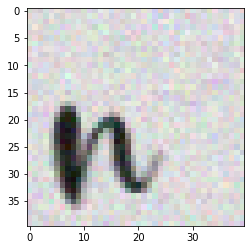

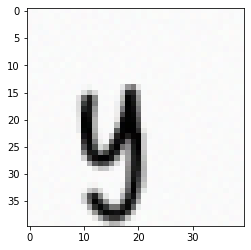

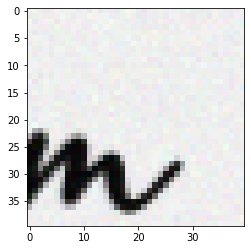

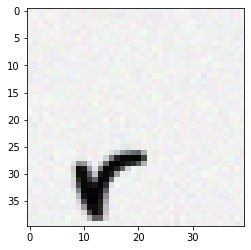

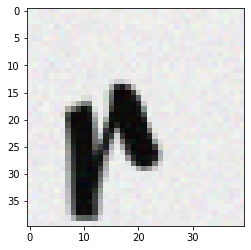

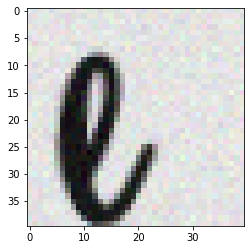

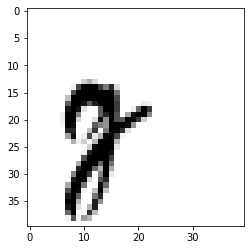

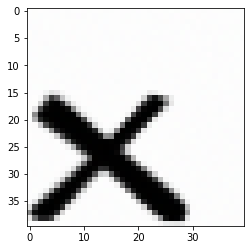

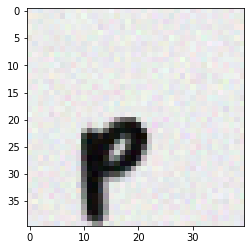

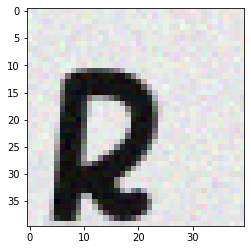

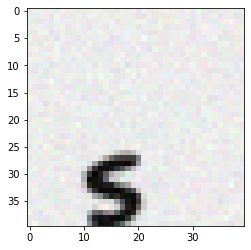

In [77]:
test_df = get_dataframe(test_dir_path)
count_test = test_df.groupby(['Label']).count()

train_data = {'Image':train.filenames , 'Label': train.classes}
train_df = pd.DataFrame(train_data)
count_train=train_df.groupby(['Label']).count()

validate_data =  {'Image':validate.filenames , 'Label': validate.classes}
validate_df = pd.DataFrame(validate_data)
count_validate = validate_df.groupby(['Label']).count()

x = np.arange(len(labels))
width = 0.4
fig,ax = plt.subplots(figsize = (27,5))
ax.bar(x-width , count_train.Image , width , label = 'Train Data')
ax.bar(x , count_validate.Image , width , label = 'Validation Data')
ax.bar(x + width, count_test.Image , width , label = 'Test Data')
ax.set_ylabel("No. Of Samples")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

#visualise 5 samples from train directory
print('Samples from Train Directory')
for i in range(5):
    visualize_image(os.path.join(train_dir_path,train_df.Image[random.randint(0,len(train_df.Image)-1)]))
    
#visualise 5 samples from validation directory
print('Samples from Validation Directory')
for i in range(5):
    visualize_image(os.path.join(validation_dir_path,validate_df.Image[random.randint(0,len(validate_df.Image)-1)]))
    
#visualise 5 samples from test directory
print('Samples from Test Directory')
for i in range(5):
    visualize_image(os.path.join(test_dir_path,test_df.Image[random.randint(0,len(test_df.Image)-1)]))

# Build Model

---
Now build the model as per the best learning rate and dropout probability value determined earlier. Summarize and plot the model architecture.

---

**2 Points**

---




<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f819a5be250>>


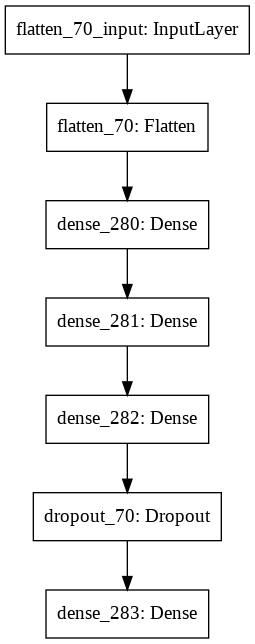

In [82]:
# Insert your code here to build the model as per the best learning rate and dropout probability values determined earlier
model_ = build_model(dropout_probability = best_prob, LR = best_lr )

# Insert your code here to print the model summary
print(model_.summary)

#Insert your code to plot the model architecture
tf.keras.utils.plot_model(model_ , to_file = "model.png" , show_shapes = False , show_layer_names = True)


# Training the Model

---
Train the model built with best hyperparameter settings. Generate a **Plot** of Epochs Vs. training and validation accuracy. Also generate a similar plot for training and validation loss. Discuss your **inferences** from the plot.


---

**7 Points**


---



Epoch 1/40
1264/1264 [==============================] - 24s 19ms/step - loss: 0.8046 - categorical_accuracy: 0.7722 - val_loss: 0.9968 - val_categorical_accuracy: 0.7273
Epoch 2/40
1264/1264 [==============================] - 24s 19ms/step - loss: 0.7948 - categorical_accuracy: 0.7727 - val_loss: 1.0059 - val_categorical_accuracy: 0.6979
Epoch 3/40
1264/1264 [==============================] - 24s 19ms/step - loss: 0.7502 - categorical_accuracy: 0.7826 - val_loss: 0.8370 - val_categorical_accuracy: 0.7513
Epoch 4/40
1264/1264 [==============================] - 24s 19ms/step - loss: 0.7197 - categorical_accuracy: 0.7950 - val_loss: 0.8949 - val_categorical_accuracy: 0.7433
Epoch 5/40
1264/1264 [==============================] - 24s 19ms/step - loss: 0.6847 - categorical_accuracy: 0.8064 - val_loss: 0.8445 - val_categorical_accuracy: 0.7487
Epoch 6/40
1264/1264 [==============================] - 24s 19ms/step - loss: 0.7178 - categorical_accuracy: 0.7927 - val_loss: 0.9541 - val_categoric

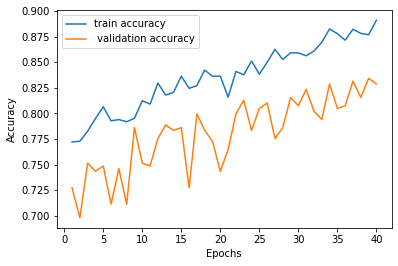

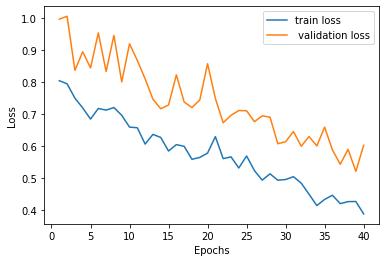

In [84]:
# Insert your code here to train the model with best hyperparameter settings using training set and validate using the validation set (1 Point)
hist = model_.fit(train, validation_data=validate,epochs = num_epochs)

# Insert your code here to obtain the lists: epochs, training accuracy, validation accuracy, training loss, validation loss (2 Points)
epoch= 40

n_epoch = []
train_accuracy = hist.history['categorical_accuracy'] 
validation_accuracy = hist.history['val_categorical_accuracy']
train_loss = hist.history['loss']
validation_loss = hist.history['val_loss']
for i in range(1,epoch+1) :
  n_epoch.append(i)


# Insert your code here to plot Epochs Vs. training and validation accuracy (2 Points)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(n_epoch, train_accuracy , label = "train accuracy")
plt.plot(n_epoch , validation_accuracy , label =" validation accuracy")
plt.legend()
plt.show()  


# Insert your code here to plot Epochs Vs. training and validation loss (2 Points)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(n_epoch, train_loss , label = "train loss")
plt.plot(n_epoch , validation_loss , label =" validation loss")
plt.legend()
plt.show()  




# Prediction

---
Evaluate performance of model on the test sets.




---
**2 Points**

---





In [127]:
# Insert your code here to get the model's performance with test set
#test_images_O = np.array([cv2.imread(os.path.join(test_dir_path , img)) for img in test_df.Image])

pred_test= model_.predict(test)
print(pred_test)


[[1.4308692e-04 4.7535341e-06 3.5794631e-02 ... 1.0306597e-04
  6.1529182e-04 3.3506687e-04]
 [8.2179805e-04 8.7647968e-05 1.3843130e-01 ... 9.8466070e-04
  5.2001838e-02 1.5385466e-02]
 [1.0398373e-03 5.0591785e-02 1.2119087e-04 ... 7.6224376e-04
  2.1449499e-02 4.4616125e-05]
 ...
 [7.9377329e-05 3.8736603e-06 5.4861084e-02 ... 1.2507317e-04
  5.7867507e-04 8.4641091e-05]
 [1.9600941e-03 7.8062720e-07 9.2189474e-04 ... 1.7090963e-05
  5.0810604e-06 9.1173533e-06]
 [3.4739687e-06 7.1484694e-04 4.5762310e-04 ... 3.9234274e-06
  5.4685470e-06 8.9944415e-06]]


# Observations

---
Write your observations from this experiment. Also, what would be your suggestions for increasing the performance of the model ?




---
**5 Points**
-Train Accuracy is better than Validation Accuracy
-Validation loss is more than Train loss
- So model works better on training dataset than validation
-Accuracy and performace on test size is good
-Increasing the training data set can improve performance
---
